In [211]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import copy
import warnings
warnings.filterwarnings('ignore')

In [212]:
def beta_param(ω,κ):
    return ω*(κ - 2) +1,(1 - ω)*(κ - 2) + 1 

In [213]:
def data_calc(n,p):
    data=np.random.binomial(1,p,n)
    return data

In [214]:
def prior_calc(a,b):
    theta = np.arange (0,1.1,0.1)
    prior = sp.stats.beta.pdf(theta,a,b)
    return theta,prior

In [215]:
def plot_progress(trace,a,b):
    
    titles=["1 data point","2 data points","3 data points","4 data points","1000 data points","4000 data points"]    
    
    fig, axs=plt.subplots(3,3,figsize=(15,15))
    axs[0,0].remove()
    axs[0,2].remove()

    theta,prior=prior_calc(a,b)
    axs[0,1].plot(theta,prior) #plot prior
    axs[0,1].title.set_text('Prior')

    for i in range(1,3):
        for j in range(3):
            if i==1:
                az.plot_posterior(trace[j],ax=axs[i,j], textsize=10.0) #plot posteriors
                axs[i,j].title.set_text(titles[j])
            else:
                az.plot_posterior(trace[j+3],ax=axs[i,j], textsize=10.0)
                axs[i,j].title.set_text(titles[j+3])
    plt.show()

#### Priors

In [216]:
priors=[(1,1)] #uniform prior
modes=[0.25,0.5,0.75] # modes at 0.25, 0.5, 0.75
for w in modes:
    a,b=beta_param(w,κ=5) 
    priors.append((a,b))

#### Data

In [217]:
n_list=[1,2,3,4,1000,4000] #number of data points

In [218]:
from pymc3 import Model, Beta, Bernoulli

#dictionary of posteriors for each prior
trace_dict={
   "non-informative": [],  
   "mode-0.25": [],
   "mode-0.5": [],
   "mode-0.75": []
}

for n in n_list:
    y=data_calc(n,p=0.25) 
    for prior in priors:
        basic_model = Model()
        with basic_model:
    # Priors for unknown model parameters
            theta = Beta('theta', alpha=prior[0],beta=prior[1])
    # Likelihood (sampling distribution) of observations
            yl = Bernoulli("yl",theta, observed=y)
            trace = pm.sample(2000, progressbar=False,return_inferencedata=False)
            traces.append(trace)
            if prior==priors[0]:
                trace_dict["non-informative"].append(trace)
            elif prior==priors[1]:
                trace_dict["mode-0.25"].append(trace)
            elif prior==priors[2]:
                trace_dict["mode-0.5"].append(trace)
            elif prior==priors[3]:
                trace_dict["mode-0.75"].append(trace)  



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS usi

#### Non-infomative prior

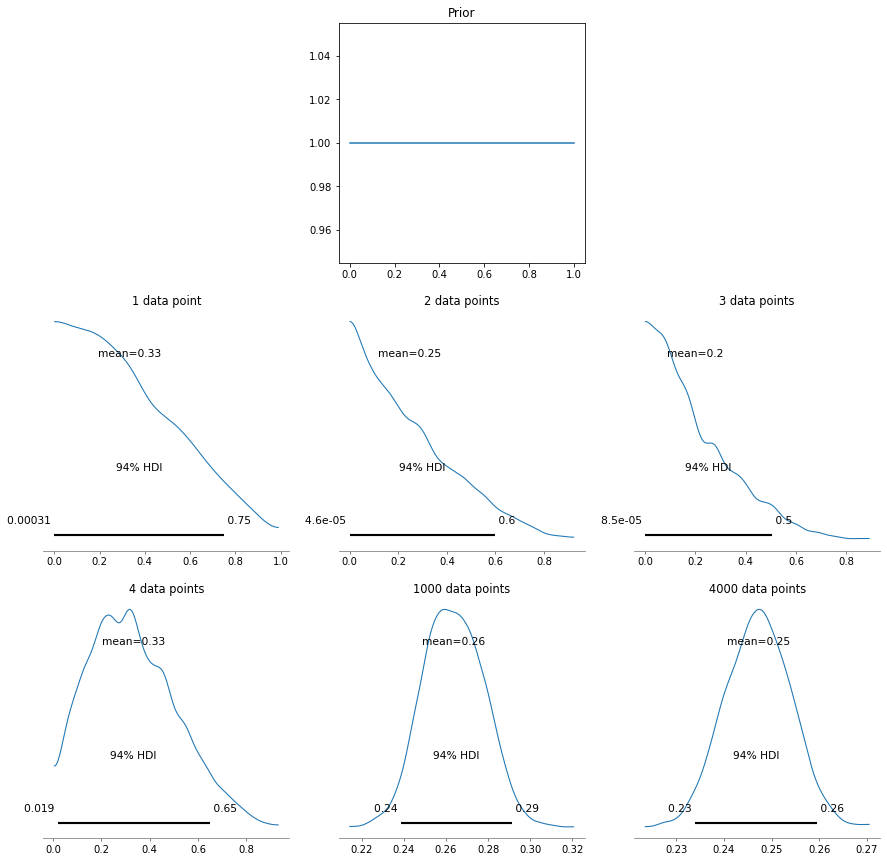

In [219]:
a,b=priors[0]
plot_progress(trace_dict['non-informative'],a,b)

#### Prior with mode - 0.25

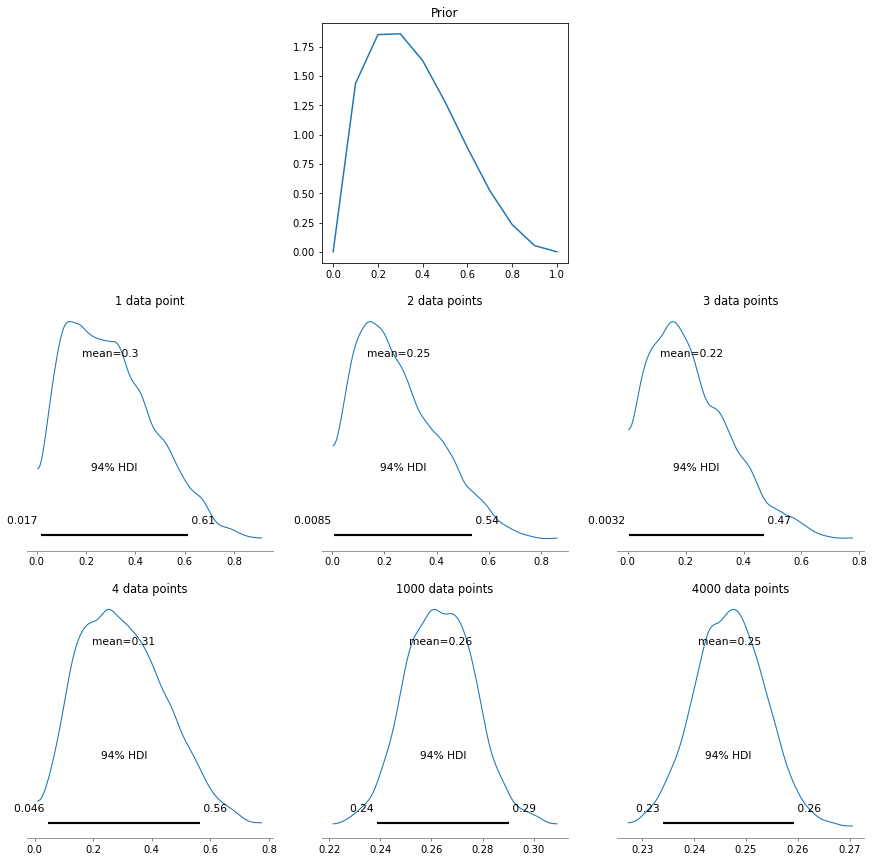

In [220]:
a,b=priors[1]
plot_progress(trace_dict['mode-0.25'],a,b)

#### Prior with mode - 0.5

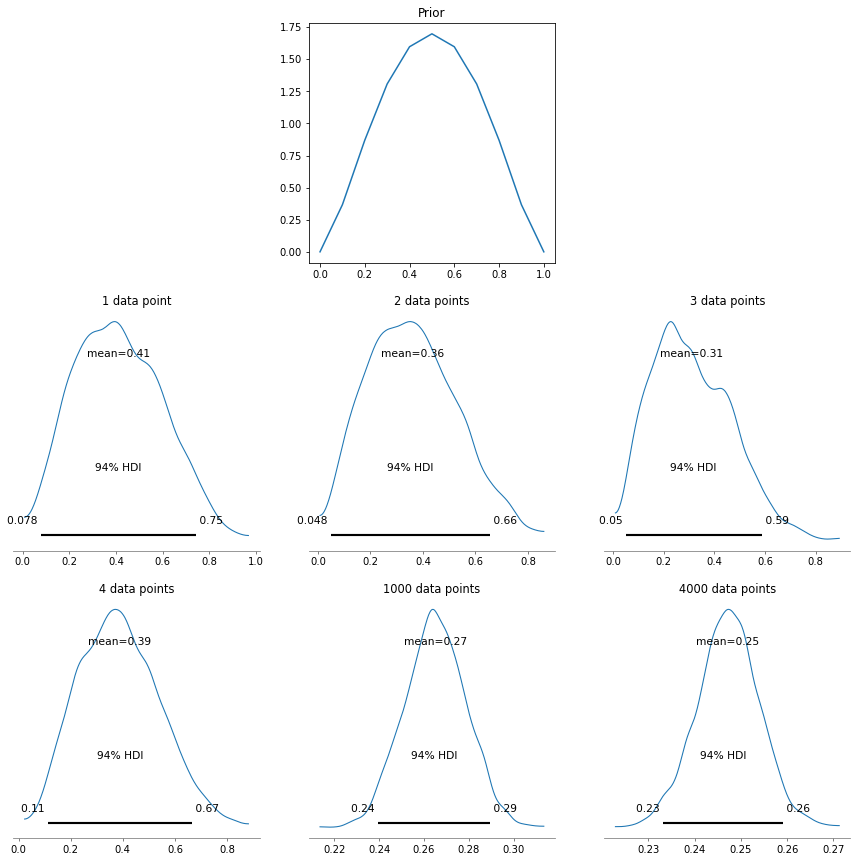

In [221]:
a,b=priors[2]
plot_progress(trace_dict['mode-0.5'],a,b)

#### Prior with mode - 0.75

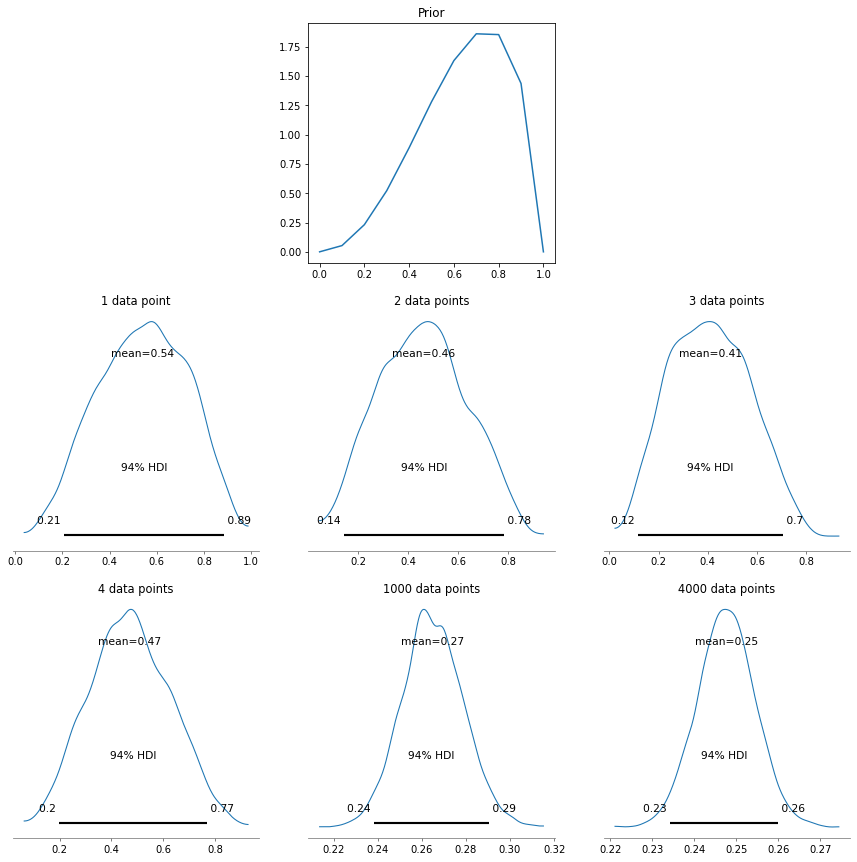

In [222]:
a,b=priors[3]
plot_progress(trace_dict['mode-0.75'],a,b)

### Entering data items one-by-one

#### First data item

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 32 seconds.


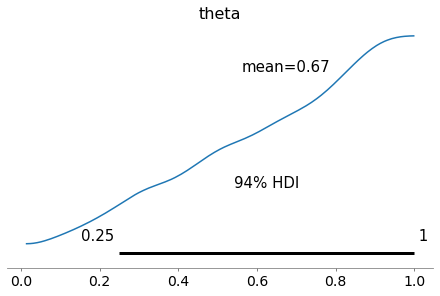

In [223]:
temp=data_calc(n=4,p=0.25)  #generating data with 4 data items
y=temp[0] #copying the first data item

traces_list3=[]
basic_model = Model()
with basic_model:
# Priors for unknown model parameters
    theta = Beta('theta', alpha=1,beta=1)
# Likelihood (sampling distribution) of observations
    yl = Bernoulli("yl",theta, observed=y)
    trace = pm.sample(2000, progressbar=False,return_inferencedata=False)
    traces_list3.append(trace)
    az.plot_posterior(trace)

#### Second data item

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 31 seconds.


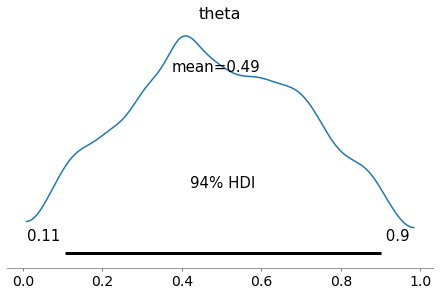

In [224]:
n=1
z=np.sum(temp[0])
y=temp[1]
 
basic_model = Model()
with basic_model:
# Priors for unknown model parameters
    theta = Beta('theta', alpha=1+z,beta=1+(n-z))
# Likelihood (sampling distribution) of observations
    yl = Bernoulli("yl",theta, observed=y)
    trace = pm.sample(2000, progressbar=False,return_inferencedata=False)
    traces_list3.append(trace)
    az.plot_posterior(trace)

#### Third data item

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 32 seconds.


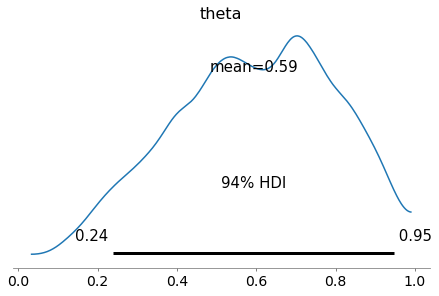

In [225]:
n=2
z=np.sum(temp[0:2])
y=temp[2]

basic_model = Model()
with basic_model:
# Priors for unknown model parameters
    theta = Beta('theta', alpha=1+z,beta=1+n-z)
# Likelihood (sampling distribution) of observations
    yl = Bernoulli("yl",theta, observed=y)
    trace = pm.sample(2000, progressbar=False,return_inferencedata=False)
    traces_list3.append(trace)
    az.plot_posterior(trace)

#### Fourth data item

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 41 seconds.


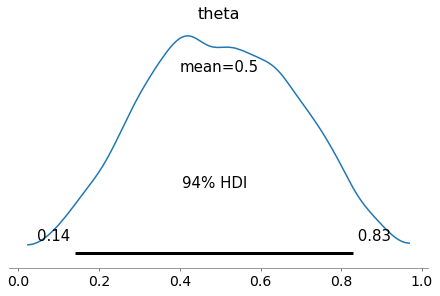

In [226]:
n=3
z=np.sum(temp[0:3])
y=temp[3]

basic_model = Model()
with basic_model:
# Priors for unknown model parameters
    theta = Beta('theta', alpha=1+z,beta=1+(n-z))
# Likelihood (sampling distribution) of observations
    yl = Bernoulli("yl",theta, observed=y)
    trace = pm.sample(2000, progressbar=False,return_inferencedata=False)
    traces_list3.append(trace)
    az.plot_posterior(trace)

#### Entering all 4 items together

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 43 seconds.


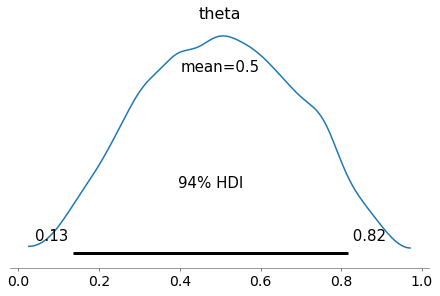

In [227]:
basic_model = Model()
with basic_model:
# Priors for unknown model parameters
    theta = Beta('theta', alpha=1,beta=1)
# Likelihood (sampling distribution) of observations
    yl = Bernoulli("yl",theta, observed=temp)
    trace = pm.sample(2000, progressbar=False,return_inferencedata=False)
    az.plot_posterior(trace)

As we can see, the posteriors are nearly identical and both iterative and batch calculation of data items have the same result.